## Librerias

In [1]:
import pandas as pd
import sqlite3

## Conexión

In [2]:
# Conectamos con la base de datos chinook.db
connection = sqlite3.connect("data/sql-murder-mystery.db")

# Obtenemos un cursor que utilizaremos para hacer las queries
crsr = connection.cursor()

In [3]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    crsr.execute(query)

    # Almacena los datos de la query 
    ans = crsr.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]

    return pd.DataFrame(ans,columns=names)

## Ayuda

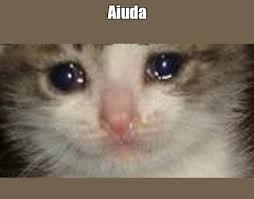

SELECT -- Extracts data from a database

FROM -- Specify the location of the table you will extract the data

INNER JOIN, ON -- keyword selects records that have matching values in both tables

WHERE -- Clause used to filter the output

ORDER BY -- keyword is used to sort the result in ascending or descending order

LIKE -- Performs a partial string match

INSERT INTO -- Adds new rows to a table

VALUES -- Specifies the values to be inserted

DISTINCT -- Filters out duplicate values from the result set

GROUP BY -- Groups rows based on specified columns

HAVING -- Filters groups based on aggregate functions

COUNT -- Calculates the number of rows or non-null values

AS -- Assigns an alias to a column or table

AND -- Combines multiple conditions in a WHERE clause

OR -- Combines multiple conditions, at least one of which must be true

## Consultas

In [16]:
pd.set_option('display.max_colwidth', None)

In [18]:
query1 = """
SELECT *
FROM crime_scene_report
WHERE type = 'murder' 
AND city = 'SQL City'
AND date = 20180115
"""

sql_query(query1)

,date,type,description,city
0,20180115,murder,"Security footage shows that there were 2 witnesses. The first witness lives at the last house on ""Northwestern Dr"". The second witness, named Annabel, lives somewhere on ""Franklin Ave"".",SQL City


In [19]:
query2 = """
SELECT name, address_number, address_street_name
FROM person
WHERE address_street_name LIKE '%Northwestern%'
ORDER BY address_number DESC
"""

sql_query(query2)

,name,address_number,address_street_name
0,Morty Schapiro,4919,Northwestern Dr
1,Lasonya Wildey,3824,Northwestern Dr
2,Sophie Tiberio,3755,Northwestern Dr
3,Torie Thalmann,3697,Northwestern Dr
4,Coretta Cubie,3631,Northwestern Dr
5,Cody Schiel,3524,Northwestern Dr
6,Emmitt Aceuedo,3491,Northwestern Dr
7,Leonora Wolfsberger,3483,Northwestern Dr
8,Freddie Ellzey,3449,Northwestern Dr
9,Boris Bijou,3327,Northwestern Dr


In [22]:
query3 = """
SELECT p.name, i.transcript
FROM interview i
INNER JOIN person p
ON i.person_id = p.id
WHERE p.name = 'Morty Schapiro'
"""

sql_query(query3)

,name,transcript
0,Morty Schapiro,"I heard a gunshot and then saw a man run out. He had a ""Get Fit Now Gym"" bag. The membership number on the bag started with ""48Z"". Only gold members have those bags. The man got into a car with a plate that included ""H42W""."


In [23]:
query4 = """
SELECT name, address_number, address_street_name
FROM person
WHERE address_street_name LIKE '%Franklin Ave%'
AND name LIKE '%Annabel%'
"""

sql_query(query4)

,name,address_number,address_street_name
0,Annabel Miller,103,Franklin Ave


In [24]:
query1 = """
SELECT p.name, i.transcript
FROM interview i
INNER JOIN person p
ON i.person_id = p.id
WHERE p.name = 'Annabel Miller'
"""

sql_query(query1)

,name,transcript
0,Annabel Miller,"I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th."


In [27]:
query1 = """
SELECT m.name
FROM get_fit_now_member as m
INNER JOIN get_fit_now_check_in as c
ON m.id = c.membership_id
INNER JOIN person as p
ON m.person_id = p.id
INNER JOIN drivers_license as l
ON p.license_id = l.id
WHERE c.check_in_date = 20180109
AND l.plate_number LIKE '%H42W%'
AND m.membership_status = 'gold'
"""

sql_query(query1)

,name
0,Jeremy Bowers


In [29]:
query3 = """
INSERT INTO solution
VALUES
(1, 'Jeremy Bowers')                                                
"""

sql_query(query3)

TypeError: 'NoneType' object is not iterable

In [30]:
query3 = """
SELECT value
FROM solution
"""

sql_query(query3)

,value
0,"Congrats, you found the murderer! But wait, there's more... If you think you're up for a challenge, try querying the interview transcript of the murderer to find the real villain behind this crime. If you feel especially confident in your SQL skills, try to complete this final step with no more than 2 queries. Use this same INSERT statement with your new suspect to check your answer."


In [28]:
query3 = """
SELECT p.name, i.transcript
FROM interview i
INNER JOIN person p
ON i.person_id = p.id
WHERE p.name = 'Jeremy Bowers'
"""

sql_query(query3)

,name,transcript
0,Jeremy Bowers,"I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5"" (65"") or 5'7"" (67""). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n"


In [49]:
query3 = """
SELECT p.name, dl.height, dl.car_make || ' ' || dl.car_model as coche, f.event_name as evento
FROM person AS p
INNER JOIN drivers_license AS dl
ON p.license_id = dl.id
INNER JOIN facebook_event_checkin AS f
ON f.person_id = p.id
WHERE dl.hair_color = 'red'
AND dl.gender = 'female'
AND dl.car_make = 'Tesla'
AND dl.car_model = 'Model S'
AND dl.height BETWEEN 65 AND 67
AND f.date LIKE '201712%'
AND f.event_name = 'SQL Symphony Concert'
GROUP BY p.name
HAVING COUNT(f.person_id)  = 3
"""

sql_query(query3)

,name,height,coche,evento
0,Miranda Priestly,66,Tesla Model S,SQL Symphony Concert


In [43]:
query3 = """
INSERT INTO solution
VALUES
(1, 'Miranda Priestly')                                                
"""

sql_query(query3)

TypeError: 'NoneType' object is not iterable

In [44]:
query3 = """
SELECT value
FROM solution
"""

sql_query(query3)

,value
0,"Congrats, you found the brains behind the murder! Everyone in SQL City hails you as the greatest SQL detective of all time. Time to break out the champagne!"


In [48]:
query3 = """
SELECT *
FROM income
ORDER BY annual_income DESC
"""

sql_query(query3).head(20)

,ssn,annual_income
0,361660921,498500
1,121635236,489800
2,118015315,486600
3,541217354,476300
4,313890530,475700
5,311494850,473100
6,800582909,449400
7,990250718,448000
8,208676025,446200
9,625660122,446000
